In [2]:
import pandas as pd
import numpy as np

from definitions import show_output, save_output, country_col, date_col, timeframe_val, sign_level
from util_general import read_data, get_timescale, get_trans, get_impl_date, get_data_path, get_table_path

from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from scipy.stats import ttest_1samp, ttest_ind

In [3]:
from statsmodels.stats.stattools import durbin_watson

In [112]:
timeframe = 'm'
model = 'arco'
country = 'france'
impl_date = get_impl_date(treatment_country=country)

In [113]:
df = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=country, model=model), 
               file_name=f'{model}_{country}_{timeframe}_act_pred_log_diff')

df_pre = df[df[date_col] < impl_date]
df_post = df[df[date_col] >= impl_date]

df

,date,act,pred,error
0,2001-01-01,-0.095988,-0.033355,-0.062632
1,2001-02-01,-0.002600,-0.018806,0.016206
2,2001-03-01,-0.077666,-0.015246,-0.062421
3,2001-04-01,0.024467,0.028466,-0.003999
4,2001-05-01,0.039254,0.016596,0.022657
...,...,...,...,...
221,2019-06-01,-0.012004,-0.014146,0.002142
222,2019-07-01,-0.015659,-0.002886,-0.012773
223,2019-08-01,-0.004483,-0.018182,0.013699
224,2019-09-01,-0.013584,-0.012732,-0.000852


In [114]:
# Durbin-Watson test
print(durbin_watson(df_pre['error']))

df_pre

1.615902793720666


,date,act,pred,error
0,2001-01-01,-0.095988,-0.033355,-0.062632
1,2001-02-01,-0.002600,-0.018806,0.016206
2,2001-03-01,-0.077666,-0.015246,-0.062421
3,2001-04-01,0.024467,0.028466,-0.003999
4,2001-05-01,0.039254,0.016596,0.022657
...,...,...,...,...
154,2013-11-01,0.016778,-0.004370,0.021149
155,2013-12-01,-0.004513,-0.021874,0.017362
156,2014-01-01,-0.108072,-0.083580,-0.024492
157,2014-02-01,-0.154661,-0.115938,-0.038723


In [118]:
print(np.sum(df_post['error']))
print(np.mean(df_post['error']))
print(np.std(df_post['error']))

-0.7350087901435856
-0.010970280449904266
0.041753116498837464


<AxesSubplot:>

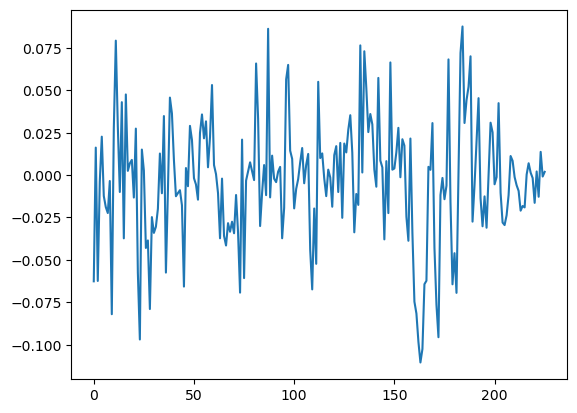

In [119]:
df['error'].plot()

<AxesSubplot:>

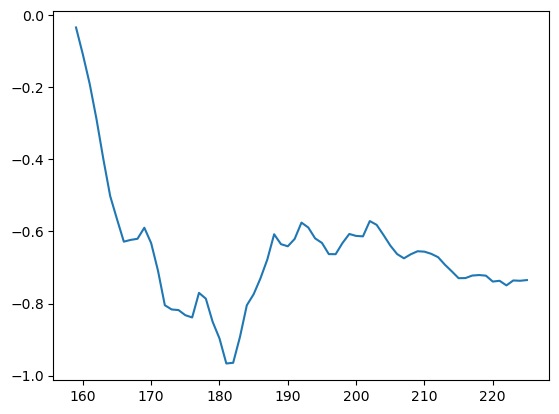

In [120]:
df_post['error'].cumsum().plot()

In [134]:
# Advanced t-test
T = len(df)
T_1 = len(df_pre)
T_2 = len(df_post)
dof = 66

gamma_1 = sum(df_pre['error']**2)/T_1
gamma_2 = sum(df_post['error']**2)/T_2

omega_hat = gamma_1 / (T_1/T) + gamma_2 / (T_2/T)
omega_hat_sqrt = np.sqrt(omega_hat)

In [135]:
print(np.mean(df_post['error']))
print(np.std(df_post['error']))
print(omega_hat_sqrt)

-0.010970280449904266
0.041753116498837464
0.08843796411469569


In [136]:
t_stat = ttest_1samp(df_post['error'], popmean=0, alternative='two-sided')
print(t_stat)

TtestResult(statistic=-2.1345228130966163, pvalue=0.03651818773002728, df=66)


In [137]:
t_stat = np.mean(df_post['error']) / (np.std(df_post['error']) / np.sqrt(T_2))
print(t_stat)

-2.150632647777136


In [138]:
from scipy.stats import t

t_stat = np.mean(df_post['error']) / (omega_hat_sqrt / np.sqrt(T))
print(t_stat)
print(2*(1 - t.cdf(abs(t_stat), dof)))

-1.8648040918648459
0.0666558286617116


In [140]:
T_2

67